# Trabajo: Clasificación con Naive Bayes realizado por Jose Alcaide

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score


* Descargamos librerias que necesitamos

In [2]:
data = pd.read_csv("house-votes-84.csv")

* Abrimos el conjunto de datos

In [3]:
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
1,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
2,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
3,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
4,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y


In [4]:
data.tail(10)

,Class Name,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
421,democrat,n,n,y,n,n,n,y,y,n,y,y,n,n,n,y,?
422,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
423,republican,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y
424,democrat,?,?,?,n,n,n,y,y,y,y,n,n,y,n,y,y
425,democrat,y,n,y,n,?,n,y,y,y,y,n,y,n,?,y,y
426,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
427,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
428,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
429,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
430,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


* Para demostrar que se ha cargado bien los datos aplicamos dos funciones:
    * data.head() : Nos arroja las 5 primeras observaciones del conjunto de datos
    * data.tail(10) : Nos devuelve las ultimas 10 observaciones

* Nota importante: Vemos que todas las variables no son numericas, por lo tanto despues debemos de transformarlas para poder aplicar los algoritmos de prediccion.

In [5]:
data.shape

(431, 17)

* Observamos las diemnsiones del dataframe que son 431 filas y 17 variables o columnas

In [6]:
data.isna().any()

Class Name                                False
handicapped-infants                       False
water-project-cost-sharing                False
doption-of-the-budget-resolution          False
physician-fee-freeze                      False
el-salvador-aid                           False
religious-groups-in-schools               False
anti-satellite-test-ban                   False
aid-to-nicaraguan-contras                 False
mx-missile                                False
immigration                               False
synfuels-corporation-cutback              False
education-spending                        False
uperfund-right-to-sue                     False
crime                                     False
duty-free-exports                         False
export-administration-act-south-africa    False
dtype: bool

In [7]:
data.isnull().sum()

Class Name                                0
handicapped-infants                       0
water-project-cost-sharing                0
doption-of-the-budget-resolution          0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
uperfund-right-to-sue                     0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

* Verificar si existe valores ausentes (missing) para tratarlo. 
    * data.isna().any() : Nos devuelve True o False si existen valores Nas por columnas. En este caso son todas False, por tannto no existen valores Nas, perdidos o Missings.
    * data.isnull().sum() : Es otra forma de averiguar si existen esos tipos de datos, pero en este caso me hace la suma de esos valores si existieran. Me devuelve en todas el valor 0, por tano no hay valores perdidos, Nas o missings

In [8]:
pd.isnull(data).values.ravel().sum()

0

* Mas de los mismo, pero en un solo comando y nos arroja la suma total de valores nulos, Nas, missing, que en este caso es 0

In [9]:
(pd.value_counts(data['Class Name'])/len(data))*100

democrat      61.484919
republican    38.515081
Name: Class Name, dtype: float64

* Queremos averiguar cuantos hay de cada uno de las clases que debemos predecir en el conjunto de datos originales.
* Hay un 61'5% de democrat y un 38,5% para los republican. Por lo tanto se puede considerar un poco desbalanceado

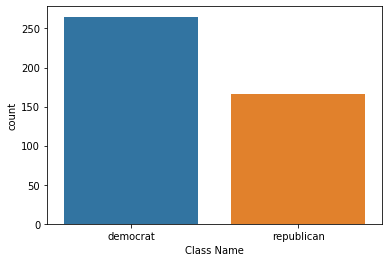

In [10]:
sns.countplot(data['Class Name'])

* Ver de forma Grafica la distribucion de los tipos de votantes.

In [11]:
data.describe()

,Class Name,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,n,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,265,233,192,251,246,209,268,239,242,207,215,263,231,205,245,229,267


* Esta funcion nos devuelve estadisticos elementales pero cuando son variables numericas, despues lo vuelvo a aplicar cuando haya realizado las transformaciones a las variables.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 17 columns):
Class Name                                431 non-null object
handicapped-infants                       431 non-null object
water-project-cost-sharing                431 non-null object
doption-of-the-budget-resolution          431 non-null object
physician-fee-freeze                      431 non-null object
el-salvador-aid                           431 non-null object
religious-groups-in-schools               431 non-null object
anti-satellite-test-ban                   431 non-null object
aid-to-nicaraguan-contras                 431 non-null object
mx-missile                                431 non-null object
immigration                               431 non-null object
synfuels-corporation-cutback              431 non-null object
education-spending                        431 non-null object
uperfund-right-to-sue                     431 non-null object
crime                      

In [13]:
data.columns.values

array(['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
       'doption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
       'mx-missile', 'immigration', 'synfuels-corporation-cutback',
       'education-spending', 'uperfund-right-to-sue', 'crime',
       'duty-free-exports', 'export-administration-act-south-africa'],
      dtype=object)

* Nos arroja los nombre de las columnas de una forma comoda para copiar los nombres de las variables mas adelante.

# Transformacion de variables

* Como he comentado anteriormente, tal como esta el conjunto de datos no podemos usarlo para poder aplicar, entes caso el algoritmo de naives bayes. Como en cada respuesta de cada variable hay tres posibles respuestass: "y","n" y "?", he dedidido tomar la opcion de crear por cada una de las variables un variables del dataset, crear variables dummy que me fabrica en test caso 3 variables nuevas dummy por cada una de ellas.
    * Teniendo el valor "1" cuando coincida con "y", y el resto 0. 
    * Otra seria un "1" cuando es "n" y el resto 0
    * Por ultimo, cuando el valor de la variable del dataset es "?" seria un 1, y el resto de posibilidades un 0.
* Con la variabe target hay que hacer lo mismo, pero en este caso solo toma dos posibles valores, democratic y republican.

In [14]:
data = pd.get_dummies(data, columns = ["Class Name"], drop_first = False)

* Para la variable a predecir, hacemos lo mismo, pero eliminamos la variable original de Class Name porque ya no nos hace falta
* Class Name_republican = 1 = Republican
* Class Name_republican = 0 = Democrat

In [15]:
data.head(10)

,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class Name_democrat,Class Name_republican
0,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,1,0
1,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,1,0
2,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y,1,0
3,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y,0,1
4,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0,1
5,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?,1,0
6,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n,0,1
7,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?,0,1
8,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?,1,0
9,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?,1,0


* Si nos fijamos tal como esta la tabla, tendriamos dos variables a predecir, con lo cual no podriamos aplicar el algoritmo.
* Vamos a eliminar una de ellas porque o es repblicano o es democrata, o es 0 o 1, no puede darse los dos valores a la vez.

* Como los datos estan desbalanceados, nos va a dar distinto resultado si elegimos 1=Democrat o 1=Republican. Voy a ver los dos casos y comprar los resultados

In [16]:
data = data.drop('Class Name_republican', axis=1)

* En este primer caso, voy a tomar caso de exito=1=democrat, por tanto elimino Class Name_republican. axis =1, quiere decir que elimine todas las filas de la variable Class Name_republican

In [17]:
data.head(7)

,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class Name_democrat
0,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,1
1,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,1
2,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y,1
3,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y,0
4,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
5,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?,1
6,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n,0


In [18]:
data.columns.values

array(['handicapped-infants', 'water-project-cost-sharing',
       'doption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
       'mx-missile', 'immigration', 'synfuels-corporation-cutback',
       'education-spending', 'uperfund-right-to-sue', 'crime',
       'duty-free-exports', 'export-administration-act-south-africa',
       'Class Name_democrat'], dtype=object)

In [19]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

* Creo una funcion para convertir en variabke dummy todas las del archivo, para que sea mas comodo y rapido y a la vez, borrar la variable original.
    * Es una funcion con dos entradas, el dataset y el nombre la la variable.
    * primero convertimos cada variable original en tantas dummis como posibles resultados tenga la variable de inicio. 
    * Borramos la variable del dataset original
    * Vamos pegando las nuevas variables una a continuacion de la anterior.
    * Devuelve el nuevo dataframe

In [20]:
data = createDummies(data,"handicapped-infants")
data = createDummies(data,"water-project-cost-sharing")
data = createDummies(data,"doption-of-the-budget-resolution")
data = createDummies(data,"physician-fee-freeze")
data = createDummies(data,"el-salvador-aid")
data = createDummies(data,"religious-groups-in-schools")
data = createDummies(data,"anti-satellite-test-ban")
data = createDummies(data,"aid-to-nicaraguan-contras")
data = createDummies(data,"mx-missile")
data = createDummies(data,"immigration")
data = createDummies(data,"synfuels-corporation-cutback")
data = createDummies(data,"education-spending")
data = createDummies(data,"uperfund-right-to-sue")
data = createDummies(data,"crime")
data = createDummies(data,"duty-free-exports")
data = createDummies(data,"export-administration-act-south-africa")

* Le pasamos a la funcion anterior, cada una de las variables del archivo primitivo para que las convierta en dummies.

In [21]:
data.head(10)

,Class Name_democrat,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,doption-of-the-budget-resolution_?,doption-of-the-budget-resolution_n,doption-of-the-budget-resolution_y,...,uperfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
6,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0
8,1,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,0,1,0,0
9,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0


In [22]:
data.describe()

,Class Name_democrat,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,doption-of-the-budget-resolution_?,doption-of-the-budget-resolution_n,doption-of-the-budget-resolution_y,...,uperfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,...,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,0.614849,0.025522,0.540603,0.433875,0.111369,0.445476,0.443155,0.025522,0.392111,0.582367,...,0.475638,0.039443,0.392111,0.568445,0.064965,0.531323,0.403712,0.238979,0.141531,0.619490
std,0.487196,0.157888,0.498928,0.496184,0.314954,0.497596,0.497335,0.157888,0.488789,0.493742,...,0.499987,0.194873,0.488789,0.495869,0.246751,0.499598,0.491211,0.426956,0.348974,0.486077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* Comprobamos que esta hecho la transformacion correcta y onserbvamos el incremento del numero de variables al realizar este cambio.
* Con esta funcion .describe() nos arroja los estadisticos basicos como maximo, minimo, la desviacion tipica, la media, primer cualrtil, segundo cuartil y tercer cuartil

In [23]:
data.shape

(431, 49)

* Pasamos de 17 variables a 49, incluyendo la variable target.

In [24]:
data.columns.values

array(['Class Name_democrat', 'handicapped-infants_?',
       'handicapped-infants_n', 'handicapped-infants_y',
       'water-project-cost-sharing_?', 'water-project-cost-sharing_n',
       'water-project-cost-sharing_y',
       'doption-of-the-budget-resolution_?',
       'doption-of-the-budget-resolution_n',
       'doption-of-the-budget-resolution_y', 'physician-fee-freeze_?',
       'physician-fee-freeze_n', 'physician-fee-freeze_y',
       'el-salvador-aid_?', 'el-salvador-aid_n', 'el-salvador-aid_y',
       'religious-groups-in-schools_?', 'religious-groups-in-schools_n',
       'religious-groups-in-schools_y', 'anti-satellite-test-ban_?',
       'anti-satellite-test-ban_n', 'anti-satellite-test-ban_y',
       'aid-to-nicaraguan-contras_?', 'aid-to-nicaraguan-contras_n',
       'aid-to-nicaraguan-contras_y', 'mx-missile_?', 'mx-missile_n',
       'mx-missile_y', 'immigration_?', 'immigration_n', 'immigration_y',
       'synfuels-corporation-cutback_?', 'synfuels-corporation-cutba

#  IMPLEMENTACION DE ALGORITMOS NAIVES BAYES

* Como los datos estan desbalanceados, es decir, existen mas de un grupo que de otro tal como hemos visto mas arriba, voy a calcular cuatro modelos basandonos en el clasificador de Naives Bayes en varias situaciones:
    * Primera, en la que la variable target es 1=Democratic y 0=Republic y modelo gaussiano
    * Segundo, en la que la variable target es 1=Republic y 0=Democrtic y modelo gaussiano
    * Tercera, casuistica bayesiana de multinomial en el caso de la variable target 1=democratc y 0=republican
    * Cuarta, casuistica bayesiana de multinomial en el caso de la variable target 1=republicam y 0=democratic
* Hemos implementado otros cuatro modelos, usando la metodologia de cross validation con 5 kfolds para intentar mejorar las predicciones pos los mimsos modelos arriba expuestos. En total, pongo a "competir" ocho modelos basados todos en el algoritmo Naive Bayes

# MODELO 1: GAUSSIAN  Y 1=DEMOCRAT  0=REPUBLICAN

In [25]:
Y_democ = data['Class Name_democrat']

* La variable a predecir

In [26]:
X = data[['handicapped-infants_?', 'handicapped-infants_n', 'handicapped-infants_y', 'water-project-cost-sharing_?', 'water-project-cost-sharing_n', 'water-project-cost-sharing_y', 'doption-of-the-budget-resolution_?', 'doption-of-the-budget-resolution_n', 'doption-of-the-budget-resolution_y', 'physician-fee-freeze_?', 'physician-fee-freeze_n', 'physician-fee-freeze_y', 'el-salvador-aid_?', 'el-salvador-aid_n', 'el-salvador-aid_y', 'religious-groups-in-schools_?', 'religious-groups-in-schools_n', 'religious-groups-in-schools_y', 'anti-satellite-test-ban_?', 'anti-satellite-test-ban_n', 'anti-satellite-test-ban_y', 'aid-to-nicaraguan-contras_?', 'aid-to-nicaraguan-contras_n', 'aid-to-nicaraguan-contras_y', 'mx-missile_?', 'mx-missile_n', 'mx-missile_y', 'immigration_?', 'immigration_n', 'immigration_y', 'synfuels-corporation-cutback_?', 'synfuels-corporation-cutback_n', 'synfuels-corporation-cutback_y', 'education-spending_?', 'education-spending_n', 'education-spending_y', 'uperfund-right-to-sue_?', 'uperfund-right-to-sue_n', 'uperfund-right-to-sue_y', 'crime_?', 'crime_n', 'crime_y', 'duty-free-exports_?', 'duty-free-exports_n', 'duty-free-exports_y', 'export-administration-act-south-africa_?', 'export-administration-act-south-africa_n', 'export-administration-act-south-africa_y']]

* El resto de variables, las inlcuyo todas en el modelo, menos la que usamos de target

In [27]:
X_train, X_test, Y_democ_train, Y_democ_test = train_test_split(X, Y_democ, test_size=0.3, random_state=0)

* Divivdimos los datos en Train y Test, al 70 % para el Train y el resto para test.

In [28]:
gnb_democrat= GaussianNB()

* le damos un nombre al algoritmo a usar

In [29]:
Y_pred_democrat = gnb_democrat.fit(X_train, Y_democ_train).predict(X_test)

* Aplicamos el algoritmo y lo ajustamos, y predecimos. Esto se repite en todos los modelos

In [30]:
print(Y_pred_democrat[0:10])


[0 1 0 1 0 1 0 0 0 1]


* Un muestra de los 10 primeros valores predichos por el modelo. Esto se repite en todos los modelos

In [31]:
print(metrics.confusion_matrix(Y_democ_test, Y_pred_democrat))

[[50  3]
 [ 7 70]]


* El modelo predice que es democrata y en realidad es democrata en 50 casos (TP)
* El modelo predice que es republicano y en realidad es replubicano en 70 veces.(TN)
* El modelo predice que es republicano y en realidad es democrata en 7 veces.(FP)
* El modelo predice que es democrata pero en realidad es republicano en 3 veces.(FN)

* Esto se repite en los cuatro primeros modelos, lo que varia es el valor de cada uno de ellos

In [32]:
print('Accuracy score: ', format(accuracy_score(Y_democ_test, Y_pred_democrat)))
print('Precision score: ', format(precision_score(Y_democ_test, Y_pred_democrat)))
print('Recall score: ', format(recall_score(Y_democ_test, Y_pred_democrat)))
print('F1 score: ', format(f1_score(Y_democ_test, Y_pred_democrat)))

Accuracy score:  0.9230769230769231
Precision score:  0.958904109589041
Recall score:  0.9090909090909091
F1 score:  0.9333333333333333


* Le pedimos varias metricas para ver el resultado del modelo basandose en la matriz de confusion:
     * Accuracy o exactitud = Mide como de a menudo el clasificador realiza la prediccion correcta. Es el ratio del numero de predicciones correctas contra el numero total de predicciones. En nuestro caso el 92 % de los casos lo clasifica correctamente.
     * Precision : Nos dice la proporcion de veces que el modelo esta en lo cierto, en nuestro caso el 96%.
     * Recall o sensibilidad = Nos dice la proporcion de votantes que realmente eran republicanos y que fueron clasificados como democratas, el 90%. o Que tal de completos son los resultados.
     * F1 = para muestras balnacenadas es muy util, ya que es el meso medio de las puntuaciones de precision y recall. en este caso es del 93%, cuanto mas cerca a 1 mejor será.
* Aunque hemos pedido que realice los cuatro calculos, me basaré en la comparacion entre los varios modelos en el F1
* Estas medidas se repiten en los cuatro primeros modelos, en los cuareo ultimos solo he calculado el F1.

# MODELO 2: GAUSSIAN  Y 1=REPUBLICAN  0=DEMOCRAT

* Hago de nuevo todo el proceso paraevitar posibles errores.
* Vamos a realizar el modelo para el caso en que 1=Republicano y 0=Democrata

In [33]:
data = pd.read_csv("house-votes-84.csv")


In [34]:
data = pd.get_dummies(data, columns = ["Class Name"], drop_first = True)

In [35]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [36]:
data = createDummies(data,"handicapped-infants")
data = createDummies(data,"water-project-cost-sharing")
data = createDummies(data,"doption-of-the-budget-resolution")
data = createDummies(data,"physician-fee-freeze")
data = createDummies(data,"el-salvador-aid")
data = createDummies(data,"religious-groups-in-schools")
data = createDummies(data,"anti-satellite-test-ban")
data = createDummies(data,"aid-to-nicaraguan-contras")
data = createDummies(data,"mx-missile")
data = createDummies(data,"immigration")
data = createDummies(data,"synfuels-corporation-cutback")
data = createDummies(data,"education-spending")
data = createDummies(data,"uperfund-right-to-sue")
data = createDummies(data,"crime")
data = createDummies(data,"duty-free-exports")
data = createDummies(data,"export-administration-act-south-africa")

In [37]:
Y_rep = data['Class Name_republican']

In [38]:
X = data[['handicapped-infants_?', 'handicapped-infants_n', 'handicapped-infants_y', 'water-project-cost-sharing_?', 'water-project-cost-sharing_n', 'water-project-cost-sharing_y', 'doption-of-the-budget-resolution_?', 'doption-of-the-budget-resolution_n', 'doption-of-the-budget-resolution_y', 'physician-fee-freeze_?', 'physician-fee-freeze_n', 'physician-fee-freeze_y', 'el-salvador-aid_?', 'el-salvador-aid_n', 'el-salvador-aid_y', 'religious-groups-in-schools_?', 'religious-groups-in-schools_n', 'religious-groups-in-schools_y', 'anti-satellite-test-ban_?', 'anti-satellite-test-ban_n', 'anti-satellite-test-ban_y', 'aid-to-nicaraguan-contras_?', 'aid-to-nicaraguan-contras_n', 'aid-to-nicaraguan-contras_y', 'mx-missile_?', 'mx-missile_n', 'mx-missile_y', 'immigration_?', 'immigration_n', 'immigration_y', 'synfuels-corporation-cutback_?', 'synfuels-corporation-cutback_n', 'synfuels-corporation-cutback_y', 'education-spending_?', 'education-spending_n', 'education-spending_y', 'uperfund-right-to-sue_?', 'uperfund-right-to-sue_n', 'uperfund-right-to-sue_y', 'crime_?', 'crime_n', 'crime_y', 'duty-free-exports_?', 'duty-free-exports_n', 'duty-free-exports_y', 'export-administration-act-south-africa_?', 'export-administration-act-south-africa_n', 'export-administration-act-south-africa_y']]

In [39]:
X_train, X_test, Y_rep_train, Y_rep_test = train_test_split(X, Y_rep, test_size=0.3, random_state=0)

In [40]:
gnb_republican= GaussianNB()

In [41]:
Y_pred_republican = gnb_republican.fit(X_train, Y_rep_train).predict(X_test)

In [42]:
print(Y_pred_republican[0:10])

[1 0 1 0 1 0 1 1 1 0]


In [43]:
print(metrics.confusion_matrix(Y_rep_test, Y_pred_republican))

[[70  7]
 [ 3 50]]


* El modelo predice que es democrata y en realidad es democrata en 70 casos (TP)
* El modelo predice que es republicano y en realidad es replubicano en 50 veces.(TN)
* El modelo predice que es republicano y en realidad es democrata en 3 veces.(FP)
* El modelo predice que es democrata pero en realidad es republicano en 7 veces.(FN)

In [44]:
print('Accuracy score: ', format(accuracy_score(Y_rep_test, Y_pred_republican)))
print('Precision score: ', format(precision_score(Y_rep_test, Y_pred_republican)))
print('Recall score: ', format(recall_score(Y_rep_test, Y_pred_republican)))
print('F1 score: ', format(f1_score(Y_rep_test, Y_pred_republican)))

Accuracy score:  0.9230769230769231
Precision score:  0.8771929824561403
Recall score:  0.9433962264150944
F1 score:  0.9090909090909091


* Conlusion. Si solo nos fijamos en el F1, en el permer caso es mejor, ya que es mayor, por lo tanto el modelo predice mejor ciando la calse es 1=democrata y 0=republicano, pues en el primer caso es 0,93 y en el segundo es 0,90.

# MODELO 3: MULTINOMIAL  Y 1=DEMOCRAT  0=REPUBLICAN

* Lo hacemos de neuvo todo para evitar errores.
* En este tercer caso, voy comparar el resultado de dos modelos de Naives Bayes, multinomial con gaussiano, y llegamos a la conclusion que es lo mismo, pues nos devuelve exactamente los mismos resultados. teniendo en cuenta como variable target 1=republicano y 0=democrata

In [45]:
data = pd.read_csv("house-votes-84.csv")

In [46]:
data = pd.get_dummies(data, columns = ["Class Name"], drop_first = False)

In [47]:
data = data.drop('Class Name_republican', axis=1)

In [48]:
data.head(7)

,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class Name_democrat
0,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,1
1,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,1
2,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y,1
3,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y,0
4,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
5,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?,1
6,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n,0


In [49]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [50]:
data = createDummies(data,"handicapped-infants")
data = createDummies(data,"water-project-cost-sharing")
data = createDummies(data,"doption-of-the-budget-resolution")
data = createDummies(data,"physician-fee-freeze")
data = createDummies(data,"el-salvador-aid")
data = createDummies(data,"religious-groups-in-schools")
data = createDummies(data,"anti-satellite-test-ban")
data = createDummies(data,"aid-to-nicaraguan-contras")
data = createDummies(data,"mx-missile")
data = createDummies(data,"immigration")
data = createDummies(data,"synfuels-corporation-cutback")
data = createDummies(data,"education-spending")
data = createDummies(data,"uperfund-right-to-sue")
data = createDummies(data,"crime")
data = createDummies(data,"duty-free-exports")
data = createDummies(data,"export-administration-act-south-africa")

In [51]:
data.head()

,Class Name_democrat,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,doption-of-the-budget-resolution_?,doption-of-the-budget-resolution_n,doption-of-the-budget-resolution_y,...,uperfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [52]:
Y_demo= data['Class Name_democrat']

In [53]:
X = data[['handicapped-infants_?', 'handicapped-infants_n', 'handicapped-infants_y', 'water-project-cost-sharing_?', 'water-project-cost-sharing_n', 'water-project-cost-sharing_y', 'doption-of-the-budget-resolution_?', 'doption-of-the-budget-resolution_n', 'doption-of-the-budget-resolution_y', 'physician-fee-freeze_?', 'physician-fee-freeze_n', 'physician-fee-freeze_y', 'el-salvador-aid_?', 'el-salvador-aid_n', 'el-salvador-aid_y', 'religious-groups-in-schools_?', 'religious-groups-in-schools_n', 'religious-groups-in-schools_y', 'anti-satellite-test-ban_?', 'anti-satellite-test-ban_n', 'anti-satellite-test-ban_y', 'aid-to-nicaraguan-contras_?', 'aid-to-nicaraguan-contras_n', 'aid-to-nicaraguan-contras_y', 'mx-missile_?', 'mx-missile_n', 'mx-missile_y', 'immigration_?', 'immigration_n', 'immigration_y', 'synfuels-corporation-cutback_?', 'synfuels-corporation-cutback_n', 'synfuels-corporation-cutback_y', 'education-spending_?', 'education-spending_n', 'education-spending_y', 'uperfund-right-to-sue_?', 'uperfund-right-to-sue_n', 'uperfund-right-to-sue_y', 'crime_?', 'crime_n', 'crime_y', 'duty-free-exports_?', 'duty-free-exports_n', 'duty-free-exports_y', 'export-administration-act-south-africa_?', 'export-administration-act-south-africa_n', 'export-administration-act-south-africa_y']]

In [54]:
X_train, X_test, Y_demo_train, Y_demo_test = train_test_split(X, Y_demo, test_size=0.3, random_state=0)

In [55]:
mnNB_democrat=  MultinomialNB()

In [56]:
Y_pred_NB_Democrat = mnNB_democrat.fit(X_train, Y_demo_train).predict(X_test)

In [57]:
print(Y_pred_NB_Democrat[0:10])

[0 1 0 1 0 1 0 0 0 0]


In [58]:
print(metrics.confusion_matrix(Y_demo_test,Y_pred_NB_Democrat))

[[51  2]
 [13 64]]


* El modelo predice que es democrata y en realidad es democrata en 51 casos (TP)
* El modelo predice que es republicano y en realidad es replubicano en 764veces.(TN)
* El modelo predice que es republicano y en realidad es democrata en 13 veces.(FP)
* El modelo predice que es democrata pero en realidad es republicano en 2 veces.(FN)

In [59]:
print('Accuracy score: ', format(accuracy_score(Y_demo_test, Y_pred_NB_Democrat)))
print('Precision score: ', format(precision_score(Y_demo_test, Y_pred_NB_Democrat)))
print('Recall score: ', format(recall_score(Y_demo_test, Y_pred_NB_Democrat)))
print('F1 score: ', format(f1_score(Y_demo_test, Y_pred_NB_Democrat)))

Accuracy score:  0.8846153846153846
Precision score:  0.9696969696969697
Recall score:  0.8311688311688312
F1 score:  0.8951048951048951


# MODELO 4: MULTINOMIAL  Y 1=REPUBLICAN  0=DEMOCRAT

In [60]:
data = pd.read_csv("house-votes-84.csv")

In [61]:
data = pd.get_dummies(data, columns = ["Class Name"], drop_first = False)

In [62]:
data = data.drop('Class Name_democrat', axis=1)

In [63]:
data.head(7)

,handicapped-infants,water-project-cost-sharing,doption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,uperfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class Name_republican
0,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,0
1,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,0
2,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y,0
3,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y,1
4,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,1
5,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?,0
6,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n,1


In [64]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [65]:
data = createDummies(data,"handicapped-infants")
data = createDummies(data,"water-project-cost-sharing")
data = createDummies(data,"doption-of-the-budget-resolution")
data = createDummies(data,"physician-fee-freeze")
data = createDummies(data,"el-salvador-aid")
data = createDummies(data,"religious-groups-in-schools")
data = createDummies(data,"anti-satellite-test-ban")
data = createDummies(data,"aid-to-nicaraguan-contras")
data = createDummies(data,"mx-missile")
data = createDummies(data,"immigration")
data = createDummies(data,"synfuels-corporation-cutback")
data = createDummies(data,"education-spending")
data = createDummies(data,"uperfund-right-to-sue")
data = createDummies(data,"crime")
data = createDummies(data,"duty-free-exports")
data = createDummies(data,"export-administration-act-south-africa")

In [66]:
data.head()

,Class Name_republican,handicapped-infants_?,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_?,water-project-cost-sharing_n,water-project-cost-sharing_y,doption-of-the-budget-resolution_?,doption-of-the-budget-resolution_n,doption-of-the-budget-resolution_y,...,uperfund-right-to-sue_y,crime_?,crime_n,crime_y,duty-free-exports_?,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_?,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1,0,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,1,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [67]:
Y_rep = data['Class Name_republican']

In [68]:
X = data[['handicapped-infants_?', 'handicapped-infants_n', 'handicapped-infants_y', 'water-project-cost-sharing_?', 'water-project-cost-sharing_n', 'water-project-cost-sharing_y', 'doption-of-the-budget-resolution_?', 'doption-of-the-budget-resolution_n', 'doption-of-the-budget-resolution_y', 'physician-fee-freeze_?', 'physician-fee-freeze_n', 'physician-fee-freeze_y', 'el-salvador-aid_?', 'el-salvador-aid_n', 'el-salvador-aid_y', 'religious-groups-in-schools_?', 'religious-groups-in-schools_n', 'religious-groups-in-schools_y', 'anti-satellite-test-ban_?', 'anti-satellite-test-ban_n', 'anti-satellite-test-ban_y', 'aid-to-nicaraguan-contras_?', 'aid-to-nicaraguan-contras_n', 'aid-to-nicaraguan-contras_y', 'mx-missile_?', 'mx-missile_n', 'mx-missile_y', 'immigration_?', 'immigration_n', 'immigration_y', 'synfuels-corporation-cutback_?', 'synfuels-corporation-cutback_n', 'synfuels-corporation-cutback_y', 'education-spending_?', 'education-spending_n', 'education-spending_y', 'uperfund-right-to-sue_?', 'uperfund-right-to-sue_n', 'uperfund-right-to-sue_y', 'crime_?', 'crime_n', 'crime_y', 'duty-free-exports_?', 'duty-free-exports_n', 'duty-free-exports_y', 'export-administration-act-south-africa_?', 'export-administration-act-south-africa_n', 'export-administration-act-south-africa_y']]

In [69]:
X_train, X_test, Y_rep_train, Y_rep_test = train_test_split(X, Y_rep, test_size=0.3, random_state=0)

In [70]:
mnNB_republican=  MultinomialNB()

In [71]:
Y_pred_NB_republican = mnNB_democrat.fit(X_train, Y_rep_train).predict(X_test)

In [72]:
print(Y_pred_NB_republican[0:10])

[1 0 1 0 1 0 1 1 1 1]


In [73]:
print(metrics.confusion_matrix(Y_rep_test,Y_pred_NB_republican))

[[64 13]
 [ 2 51]]


* El modelo predice que es democrata y en realidad es democrata en 64 casos (TP)
* El modelo predice que es republicano y en realidad es replubicano en 51 veces.(TN)
* El modelo predice que es republicano y en realidad es democrata en 2 veces.(FP)
* El modelo predice que es democrata pero en realidad es republicano en 13 veces.(FN)

In [74]:
print('Accuracy score: ', format(accuracy_score(Y_rep_test, Y_pred_NB_republican)))
print('Precision score: ', format(precision_score(Y_rep_test, Y_pred_NB_republican)))
print('Recall score: ', format(recall_score(Y_rep_test, Y_pred_NB_republican)))
print('F1 score: ', format(f1_score(Y_rep_test, Y_pred_NB_republican)))

Accuracy score:  0.8846153846153846
Precision score:  0.796875
Recall score:  0.9622641509433962
F1 score:  0.8717948717948717


# Aplicamos el metodo de validacion cruzada, pues existen pocos datos y el modelo puede generar un sobreajuste

# MODELO 5: GAUSSIANO, CROSSVALIDATION, 1=DEMOCRAT Y 0=REPUBLICAN

In [75]:
data = pd.read_csv("house-votes-84.csv")

In [76]:
data = pd.get_dummies(data, columns = ["Class Name"], drop_first = False)

In [77]:
data = data.drop('Class Name_republican', axis=1)

In [78]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [79]:
data = createDummies(data,"handicapped-infants")
data = createDummies(data,"water-project-cost-sharing")
data = createDummies(data,"doption-of-the-budget-resolution")
data = createDummies(data,"physician-fee-freeze")
data = createDummies(data,"el-salvador-aid")
data = createDummies(data,"religious-groups-in-schools")
data = createDummies(data,"anti-satellite-test-ban")
data = createDummies(data,"aid-to-nicaraguan-contras")
data = createDummies(data,"mx-missile")
data = createDummies(data,"immigration")
data = createDummies(data,"synfuels-corporation-cutback")
data = createDummies(data,"education-spending")
data = createDummies(data,"uperfund-right-to-sue")
data = createDummies(data,"crime")
data = createDummies(data,"duty-free-exports")
data = createDummies(data,"export-administration-act-south-africa")

In [80]:
validation_size = 0.30
seed = 7
X_train, X_test, Y_demo_train, Y_demo_test = model_selection.train_test_split(X, Y_demo, test_size=validation_size, random_state=seed)

In [81]:
name='F1_NVGB_demo'
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cv_results = model_selection.cross_val_score(gnb_democrat, X_train, Y_demo_train, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

F1_NVGB_demo: 0.961970 (0.023617)


# MODELO 6: GAUSSIANO, CROSS VALIDATION, 1=REPUBIC Y 0=DEMOCRAT

In [82]:
X_train, X_test, Y_rep_train, Y_rep_test = model_selection.train_test_split(X, Y_rep, test_size=validation_size, random_state=seed)

In [83]:
name='F1_NVGB_rep'
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cv_results = model_selection.cross_val_score(gnb_republican, X_train, Y_rep_train, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

F1_NVGB_rep: 0.939047 (0.036503)


* Lo que aparece entre parentesis es en lo que podemos tanto subir como bajar en nuestra prediccion del F1, es la desviacion estandar del F1, y se repeite en todos los modelos de cross validation, es decir puede ser el F1 entre 0,97555 y 0,902544

# MODELO 7: MULTINOMIAL, CROSS VALIDATION, 0=REPUBIC Y 1=DEMOCRAT

In [84]:
X_train, X_test, Y_demo_train, Y_demo_test = model_selection.train_test_split(X, Y_demo, test_size=validation_size, random_state=seed)

In [85]:
name='F1_Multi_demo'
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cv_results = model_selection.cross_val_score(mnNB_democrat, X_train, Y_demo_train, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

F1_Multi_demo: 0.919251 (0.045548)


# MODELO 8: MULTINOMIAL, CROSS VALIDATION, 1=REPUBLIC Y 0=DEMOCRAT

In [86]:
X_train, X_test, Y_rep_train, Y_rep_test = model_selection.train_test_split(X, Y_rep, test_size=validation_size, random_state=seed)

In [87]:
name='F1_Multi_rep'
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cv_results = model_selection.cross_val_score(mnNB_democrat, X_train, Y_rep_train, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

F1_Multi_rep: 0.878236 (0.061804)


# CONCLUSION

* Para visualizar mejor todo, creo una fataframe con los valores de F1 y F1 con cross validation y vemos las mejoras

In [90]:
df_f1 = pd.DataFrame({'modelo': ['Gaussian_demo', 'Gaussian_rep', 'Multi_demo','Multi_rep'], 'f1': [0.93 ,0.90 ,0.89 ,0.87], 'f1-kfold' : [0.96, 0.93, 0.92,0.88]})

In [91]:
print(df_f1)

          modelo    f1  f1-kfold
0  Gaussian_demo  0.93      0.96
1   Gaussian_rep  0.90      0.93
2     Multi_demo  0.89      0.92
3      Multi_rep  0.87      0.88


* Basandome en la metrica F1 es la medida armónica de la precision y la exhaustividad(Recall).El valor F1 asume que nos importa de igual forma la precisión y la exhaustividad (Recall). Es una buena metrica para comparar modelos entre si. Cuanto mas cerca a 1 mejor es el modelo.
* El mejor modelo simple, es el modelo Gaussiano en el que la variable predictora es 1 = Democratic y 0 = Repiblican pues es la que da mayor F1 de entre los 4 modelos.
* Si aplicamos el metodo de Cross validation, en general, vemos que todos los modelos aumentan su F1, con lo cual podemos decir que es mejor aplicarlo este metodo que no aplicarlo.
* De los cuatro modelos y aplicado el Cross validation sigue siendo el merjor el modelo 1 que es el gaussiano con la variable predictora 1=Democratic y 0=Republican ya que tiene el F1 mas alto de todos que es el 0.96.

Nota1: Se bien que todos los algoritmos y su metricas, se podian haber realizado a la vez con una funcion, pero para poder explicarlo y sobre todo, entenderlo "yo" todo los pasos, he preferido realizarlo tal como presento el trabajo. Aunque muchas instrucciones son repetitivas, me ahorro de posibles fallos y computacionalmente no sea el mejor.. Partiendo de la base que soy estadistico y no soy informatico
Nota2: Aunque parezca repetitivo, costoso computacionalmnente y sobre todo, basado en mi mini-experiencia, he preferido realizar casi todas las operaciones de transfromaciones de variables en cada uno de los modelos (sobre todo en los cuatro primeros) para evitar posibles fallos a la hora de realizar el proceso.